<a href="https://colab.research.google.com/github/jcppaula/Deteccao_Facial_com_Opencv_e_Dlib/blob/main/Facial_Landmarks_com_OpenCV_e_dlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Detecção Facil com OpenCV e Dlib

Nesse colab iremos usar as bibliotecas OpenCV e Dlib para fazer uma detecção facial, para isso iremos usar uma base treinada que é capaz de localizar 68 pontos na face.

Começaremos importando as bibliotecas que vão ser usadas nesse projeto:

` dlib ` - O dlib é uma biblioteca de aprendizado de máquina que oferece uma ampla gama de recursos para processamento de imagens e visão computacional.
É amplamente utilizado para tarefas como detecção de objetos, detecção e alinhamento facial, reconhecimento facial, rastreamento de objetos, entre outros. No contexto do código que iremos fazer, o dlib será usado para detectar faces em uma imagem e prever os pontos faciais (como olhos, nariz, boca).

` Opencv ` - O OpenCV é uma biblioteca de código aberto muito popular e amplamente utilizada em visão computacional e processamento de imagens.
Ela fornece uma vasta coleção de funções e algoritmos para tarefas de processamento de imagens, como leitura, gravação, redimensionamento, transformação, detecção de objetos, segmentação, reconhecimento de padrões, entre outros. O OpenCV será usado no nosso código para realizar operações como leitura de imagens, conversão para escala de cinza, desenho de retângulos e pontos faciais, e exibição da imagem resultante.

` Imutils ` - O imutils é uma biblioteca utilitária que oferece várias funções e classes para facilitar a manipulação de imagens e simplificar tarefas comuns de processamento de imagens. Ela fornece funcionalidades úteis, como redimensionamento, rotação, translação, ajuste de contraste, entre outros. No nosso código, o imutils é usado para redimensionar a imagem, garantindo que ela tenha um tamanho adequado para processamento e exibição.

` from google.colab.patches import cv2_imshow ` - *v2_imshow* é uma função específica do ambiente de programação Google Colab, que permite exibir imagens diretamente na célula de saída. No nosso código, o *cv2_imshow* é usado para exibir a imagem resultante, com os retângulos e pontos faciais desenhados, dentro do ambiente Colab.

In [7]:
# importar as bibliotecas necessárias
import dlib
import cv2
import imutils
from google.colab.patches import cv2_imshow
from imutils import face_utils

Nesta etapa iremos carregar a imagem e o modelo treinado `shape_predictor_68_face_landmarks.dat`, esse código vai fazer a detecção das faces na foto em escala de cinza.

In [13]:
detector_faces = dlib.get_frontal_face_detector()
predictor_pontos = dlib.shape_predictor("/content/shape_predictor_68_face_landmarks.dat")
imagem_entrada = cv2.imread("/content/JBF_5865.jpg")
imagem_cinza = cv2.cvtColor(imagem_entrada, cv2.COLOR_BGR2GRAY)
rects = detector_faces(imagem_cinza, 1)

Nesta etapa iremos usar a biblioteca *face_utils* para percorrer a imagem e desenhar os retângulos delimitando nas faces detectadas e desenhar círculos nos pontos faciais identificados, fornecendo a visualização dos resultados. 

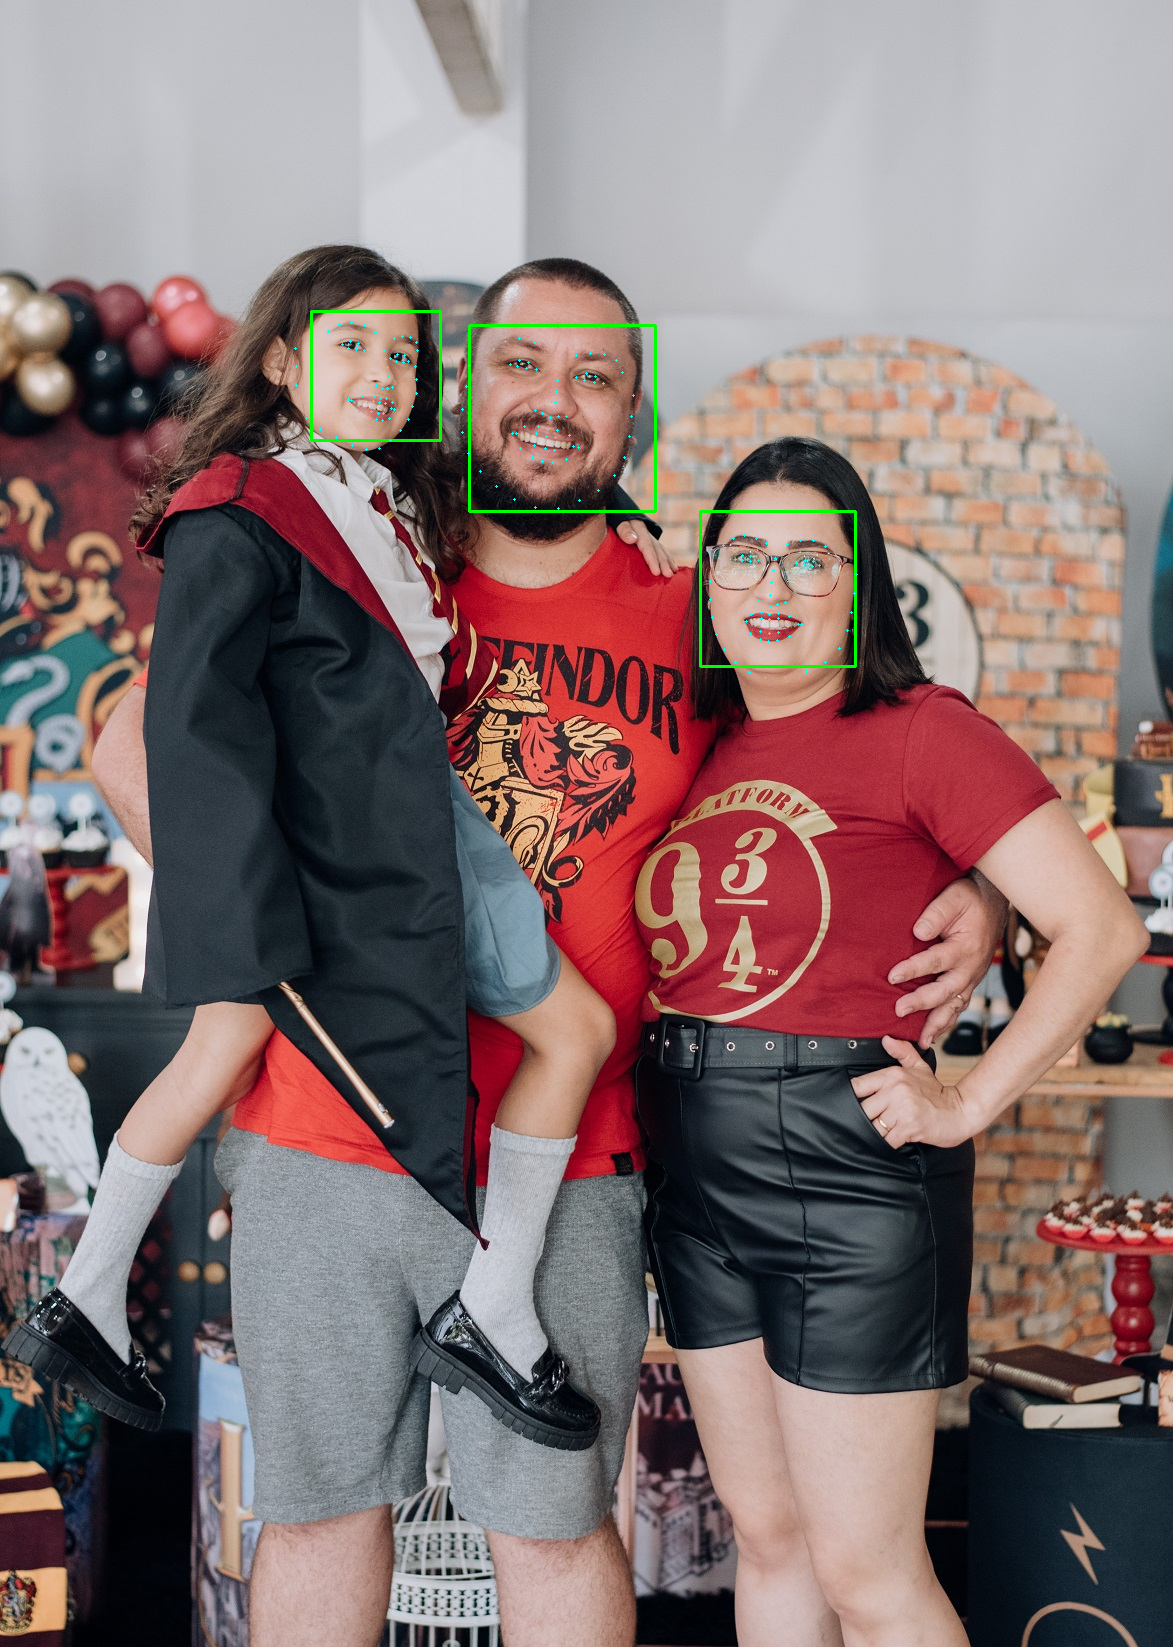

In [18]:
for (i, rect) in enumerate(rects):
    pontos_referencia = predictor_pontos(imagem_cinza, rect)
    pontos_referencia = face_utils.shape_to_np(pontos_referencia)


    # (x, y, w, h)
    (x, y, w, h) = face_utils.rect_to_bb(rect)
    cv2.rectangle(imagem_entrada, (x, y), (x+w, y+h), (0, 255, 0), 2)

    for (x, y) in pontos_referencia:
        cv2.circle(imagem_entrada, (x, y), 1, (255, 255, 0), -1,)

cv2_imshow(imagem_entrada)
